# Research hackathon year 1 - Numerical ML classifiers and Explainable AI

Data: http://emscad.samos.aegean.gr/

Aim: Build and test ML features with numerical features

### Imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


In [22]:
df_train = pd.read_csv("df_train_bal.csv")
df_test = pd.read_csv("df_test.csv")

In [23]:
df_train

,description,has_short_company_profile,company_profile,requirements,benefits,has_company_logo,low_required_education,has_questions,telecommuting,has_short_requirements,money_in_title,money_in_desc,cons_punc_des,fraudulent
0,97,0,86,68,53,1,1,0,0,0,1,0,0,1
1,41,0,141,246,117,1,0,1,0,0,0,0,0,0
2,168,0,62,54,107,1,0,0,0,0,0,0,0,0
3,106,1,1,111,111,0,0,0,0,0,0,0,0,1
4,113,0,32,75,32,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25321,77,0,149,37,20,1,1,1,0,0,0,0,0,0
25322,90,0,90,129,61,1,0,1,0,0,0,0,0,0
25323,114,0,18,28,9,1,0,0,0,0,0,1,0,0
25324,645,0,46,154,37,1,0,0,0,0,0,0,0,1


In [24]:
X_train = df_train.iloc[:,0:13] 
y_train = df_train.iloc[:,13]  

X_test = df_test.iloc[:,0:13] 
y_test = df_test.iloc[:,13] 

## Simple Logistic Regressor (baseline model)

Accuracy (overall correct predictions): 0.81
Auc: 0.83
Recall (all 1s predicted right): 0.76
Precision (confidence when predicting a 1): 0.17
Detail:
              precision    recall  f1-score   support

           0       0.99      0.82      0.89      4266
           1       0.17      0.76      0.27       204

    accuracy                           0.81      4470
   macro avg       0.58      0.79      0.58      4470
weighted avg       0.95      0.81      0.87      4470



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


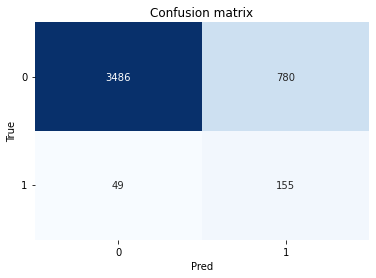

In [25]:
from sklearn.linear_model import LogisticRegression

# create model
model = LogisticRegression()

model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)[:,1]

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

## Decision Tree

Accuracy (overall correct predictions): 0.89
Auc: 0.9
Recall (all 1s predicted right): 0.82
Precision (confidence when predicting a 1): 0.28
Detail:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      4266
           1       0.28      0.82      0.42       204

    accuracy                           0.89      4470
   macro avg       0.63      0.86      0.68      4470
weighted avg       0.96      0.89      0.92      4470



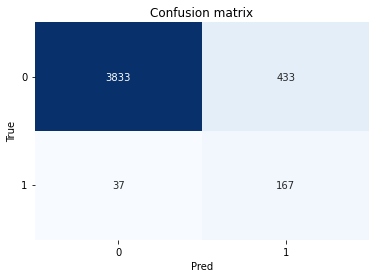

In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=7, random_state=42)

model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)[:,1]

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

## Random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
## call model
rf = RandomForestClassifier(n_estimators = 50, random_state = 26)
# fit model
rf.fit(X_train, y_train)

predicted_prob = rf.predict_proba(X_test)[:,1]
rf_predicted = rf.predict(X_test)

## Accuray and AUC
accuracy = metrics.accuracy_score(y_test, rf_predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision and Recall
recall = metrics.recall_score(y_test, rf_predicted)
precision = metrics.precision_score(y_test, rf_predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, rf_predicted, target_names=[str(i) for i in np.unique(y_test)]))


Accuracy (overall correct predictions): 0.96
Auc: 0.94
Recall (all 1s predicted right): 0.52
Precision (confidence when predicting a 1): 0.61
Detail:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4266
           1       0.61      0.52      0.57       204

    accuracy                           0.96      4470
   macro avg       0.80      0.75      0.77      4470
weighted avg       0.96      0.96      0.96      4470



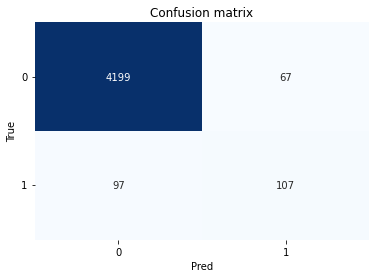

In [35]:
import seaborn as sns

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, rf_predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

## Gradient boosting

In [40]:
## call model
GB = ensemble.GradientBoostingClassifier(max_depth=10, random_state=26)
GB.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, random_state=26)

Accuracy (overall correct predictions): 0.96
Auc: 0.95
Recall (all 1s predicted right): 0.68
Precision (confidence when predicting a 1): 0.52
Detail:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4266
           1       0.52      0.68      0.59       204

    accuracy                           0.96      4470
   macro avg       0.75      0.83      0.78      4470
weighted avg       0.96      0.96      0.96      4470



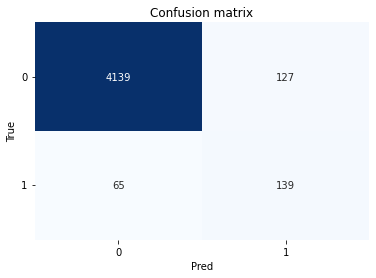

In [41]:
## test
predicted = GB.predict(X_test)
predicted_prob = GB.predict_proba(X_test)[:,1]

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

# Explainable AI

In [42]:
import shap

In [43]:
# Fits the explainer
explainer = shap.Explainer(GB.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 4471it [05:57, 12.19it/s]                                


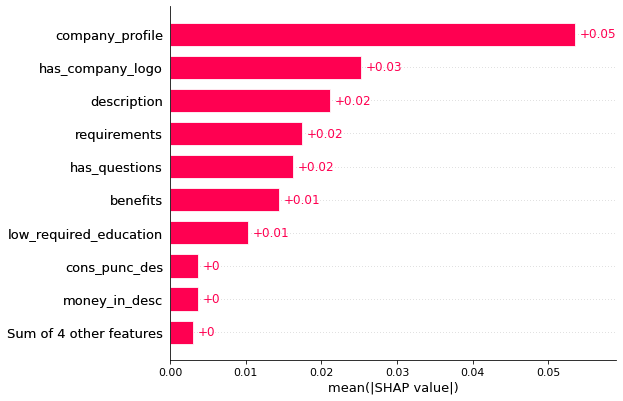

In [44]:
shap.plots.bar(shap_values)


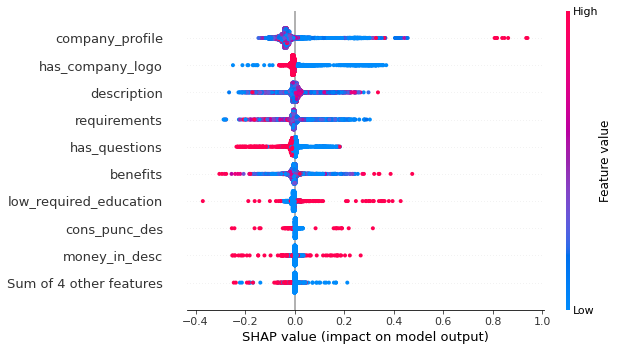

In [45]:
shap.plots.beeswarm(shap_values)